# 1. Data Ingestion & Quality Profiling

## 1.1 Load & Inspect


### 1.1.1 Read car_prices.csv into a pandas DataFrame.

In [79]:
import pandas as pd
import matplotlib.pyplot as mp
df = pd.read_csv("car_prices.csv")

### 1.1.2 Display the first 5 rows.

In [80]:
df.head(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


### 1.1.3 Display data types and record count.

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


## 1.2 Understanding the Data Structure

### 1.2.1 Check the shape of the dataset (rows and columns)

In [82]:
df.shape

(558837, 16)

### 1.2.2 Display column names and data types. 

In [83]:
df.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr             float64
sellingprice    float64
saledate         object
dtype: object

## 1.3 Missing & Anomaly Detection 

### 1.3.1 Quantify nulls per column; visualize with a bar chart or heatmap.

In [84]:
df.isnull()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
558833,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
558834,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
558835,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [85]:
null_counts = df.isnull().sum()
null_counts

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

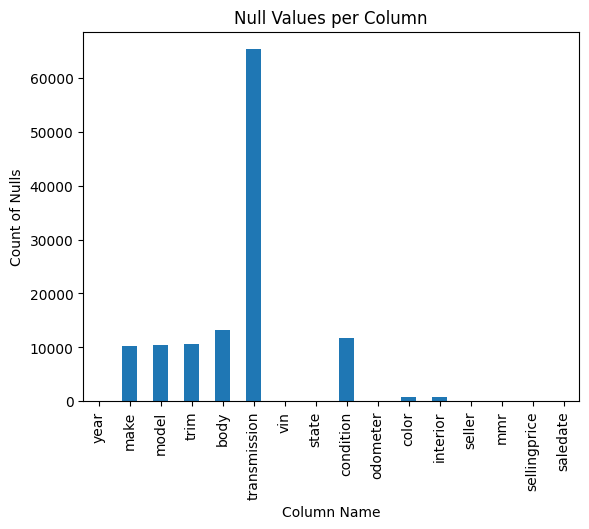

In [86]:
null_counts.plot(kind= "bar")
mp.title("Null Values per Column")
mp.ylabel("Count of Nulls")
mp.xlabel("Column Name")
mp.xticks(rotation= 90)
mp.show()

### 1.3.2 Resolve null values by appropriate strategy based on the datatype and percentage of null values. 

In [87]:
null_percent = df.isnull().mean() * 100
null_percent

year             0.000000
make             1.843292
model            1.860829
trim             1.905922
body             2.361154
transmission    11.694287
vin              0.000716
state            0.000000
condition        2.115107
odometer         0.016821
color            0.134028
interior         0.134028
seller           0.000000
mmr              0.006800
sellingprice     0.002147
saledate         0.002147
dtype: float64

In [88]:
df1 = df.copy() # Keeping the original dataset intouched without any transfirmation
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [89]:
df1["make"].fillna(df1["make"].mode()[0], inplace= True) # filling nulls with mode incase of "make"

C:\Users\Sundaram Samaddae\AppData\Local\Temp\ipykernel_10920\3106541739.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1["make"].fillna(df1["make"].mode()[0], inplace= True) # filling nulls with mode incase of "make"


In [90]:
df1["model"].fillna(df1.groupby("make")["model"].apply(lambda x: x.mode())[0], inplace=True) # filling nulls with mode incase of "model" but according to "make"

C:\Users\Sundaram Samaddae\AppData\Local\Temp\ipykernel_10920\1844435071.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df1["model"].fillna(df1.groupby("make")["model"].apply(lambda x: x.mode())[0], inplace=True) # filling nulls with mode incase of "model" but according to "make"
C:\Users\Sundaram Samaddae\AppData\Local\Temp\ipykernel_10920\1844435071.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) ins

In [91]:
df1["trim"].fillna(df1.groupby(["make", "model"])["trim"].apply(lambda x: x.mode())[0], inplace=True) # filling nulls with mode incase of "trim" but according to "make" "model"

C:\Users\Sundaram Samaddae\AppData\Local\Temp\ipykernel_10920\822430911.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df1["trim"].fillna(df1.groupby(["make", "model"])["trim"].apply(lambda x: x.mode())[0], inplace=True) # filling nulls with mode incase of "trim" but according to "make" "model"
C:\Users\Sundaram Samaddae\AppData\Local\Temp\ipykernel_10920\822430911.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].met

In [92]:
df1["body"].fillna(df1.groupby(["make", "model", "trim"])["body"].apply(lambda x: x.mode())[0], inplace=True) # filling nulls with mode incase of "body" but according to "make", "model", "trim"

C:\Users\Sundaram Samaddae\AppData\Local\Temp\ipykernel_10920\2057703287.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df1["body"].fillna(df1.groupby(["make", "model", "trim"])["body"].apply(lambda x: x.mode())[0], inplace=True) # filling nulls with mode incase of "body" but according to "make", "model", "trim"
C:\Users\Sundaram Samaddae\AppData\Local\Temp\ipykernel_10920\2057703287.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df

In [93]:
df1["transmission"].fillna(df1.groupby(["make", "model", "trim", "body"])["transmission"].apply(lambda x: x.mode())[0], inplace=True) # filling nulls with mode incase of "transmission" but according to "make", "model", "trim", "body"

C:\Users\Sundaram Samaddae\AppData\Local\Temp\ipykernel_10920\4005056544.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df1["transmission"].fillna(df1.groupby(["make", "model", "trim", "body"])["transmission"].apply(lambda x: x.mode())[0], inplace=True) # filling nulls with mode incase of "transmission" but according to "make", "model", "trim", "body"
C:\Users\Sundaram Samaddae\AppData\Local\Temp\ipykernel_10920\4005056544.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.m

In [94]:
df1["condition"].fillna(df1["condition"].median(), inplace= True) ## filling nulls with median incase of "condition"

C:\Users\Sundaram Samaddae\AppData\Local\Temp\ipykernel_10920\359522728.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1["condition"].fillna(df1["condition"].median(), inplace= True) ## filling nulls with median incase of "condition"


In [95]:
df1["odometer"].fillna(df1["odometer"].median(), inplace= True) ## filling nulls with median incase of "odometer"

C:\Users\Sundaram Samaddae\AppData\Local\Temp\ipykernel_10920\4049512789.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1["odometer"].fillna(df1["odometer"].median(), inplace= True) ## filling nulls with median incase of "odometer"


In [96]:
df1["color"].value_counts() # check for counts to see any abnormalities

color
black        110970
white        106673
silver        83389
gray          82857
blue          51139
red           43569
—             24685
green         11382
gold          11342
beige          9222
burgundy       8972
brown          6717
orange         2078
purple         1561
off-white      1449
yellow         1285
charcoal        479
turquoise       236
pink             42
lime             15
4802              1
9410              1
1167              1
2172              1
14872             1
12655             1
15719             1
6388              1
16633             1
11034             1
2711              1
6864              1
339               1
18384             1
9887              1
9837              1
20379             1
20627             1
721               1
6158              1
2817              1
5705              1
18561             1
2846              1
9562              1
5001              1
Name: count, dtype: int64

In [97]:
df1["color"].fillna(df1["color"].mode()[0], inplace= True) # filling nulls with mode incase of "color"

C:\Users\Sundaram Samaddae\AppData\Local\Temp\ipykernel_10920\533945185.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1["color"].fillna(df1["color"].mode()[0], inplace= True) # filling nulls with mode incase of "color"


In [98]:
df1["interior"].value_counts() # check for counts to see any abnormalities

interior
black        244329
gray         178581
beige         59758
tan           44093
—             17077
brown          8640
red            1363
blue           1143
silver         1104
off-white       480
purple          339
gold            324
white           256
green           245
burgundy        191
orange          145
yellow           20
Name: count, dtype: int64

In [99]:
df1["interior"].fillna(df1["interior"].mode()[0], inplace= True) # filling nulls with mode incase of "interior"

C:\Users\Sundaram Samaddae\AppData\Local\Temp\ipykernel_10920\3733011107.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1["interior"].fillna(df1["interior"].mode()[0], inplace= True) # filling nulls with mode incase of "interior"


In [100]:
df1["mmr"].fillna(df1["mmr"].median(), inplace= True) # filling nulls with median incase of "mmr"

C:\Users\Sundaram Samaddae\AppData\Local\Temp\ipykernel_10920\1463405680.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1["mmr"].fillna(df1["mmr"].median(), inplace= True) # filling nulls with median incase of "mmr"


In [101]:
df1["sellingprice"].fillna(df1["mmr"], inplace=True) # filling nulls with "mmr" incase of "sellingprice"

C:\Users\Sundaram Samaddae\AppData\Local\Temp\ipykernel_10920\1539917380.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1["sellingprice"].fillna(df1["mmr"], inplace=True) # filling nulls with "mmr" incase of "sellingprice"


In [102]:
# vin number are used for identification hence we can drop them as these will not provide us any other informations
df1.drop("vin", axis=1, inplace=True)

In [103]:
df1["saledate"].fillna(df1.groupby("year")["saledate"].transform(lambda x: x.mode())[0], inplace=True) # filling nulls with mode incase of "saledate" but according to "year"

C:\Users\Sundaram Samaddae\AppData\Local\Temp\ipykernel_10920\1143670173.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1["saledate"].fillna(df1.groupby("year")["saledate"].transform(lambda x: x.mode())[0], inplace=True) # filling nulls with mode incase of "saledate" but according to "year"


In [104]:
df1.isnull().mean()*100

year            0.0
make            0.0
model           0.0
trim            0.0
body            0.0
transmission    0.0
state           0.0
condition       0.0
odometer        0.0
color           0.0
interior        0.0
seller          0.0
mmr             0.0
sellingprice    0.0
saledate        0.0
dtype: float64

### 1.3.3 Count number of duplicate records and delete if any present

In [105]:
df1.duplicated().sum() # To count the duplicate records

np.int64(0)

# 2. Data frames Queries

## 2.1 Calculate the average, minimum, and maximum car price?

In [106]:
average_car_price = round(df1["sellingprice"].mean(), 2)
print("Average car price: ", average_car_price)

Average car price:  13611.33


In [107]:
maximum_car_price = df1["sellingprice"].max()
print("Maximum car price: ", maximum_car_price)

Maximum car price:  230000.0


In [108]:
minimum_car_price = df1["sellingprice"].min()
print("Minimum car price: ", minimum_car_price)

Minimum car price:  1.0


## 2.2 List all unique colors of cars?

In [109]:
unique_colors = df1["color"].unique()
print("Unique Car Colors:", unique_colors)

Unique Car Colors: ['white' 'gray' 'black' 'red' 'silver' 'blue' 'brown' 'beige' 'purple'
 'burgundy' '—' 'gold' 'yellow' 'green' 'charcoal' 'orange' 'off-white'
 'turquoise' 'pink' 'lime' '4802' '9410' '1167' '2172' '14872' '12655'
 '15719' '6388' '16633' '11034' '2711' '6864' '339' '18384' '9887' '9837'
 '20379' '20627' '721' '6158' '2817' '5705' '18561' '2846' '9562' '5001']


## 2.3 Find the number of unique car brands and car models?

In [110]:
unique_brands = df1["make"].nunique()
print("Number of unique car brands:", unique_brands)


Number of unique car brands: 96


In [111]:
unique_models = df1["model"].nunique()
print("Number of unique car models:", unique_models)

Number of unique car models: 973


## 2.4 Find all car information having selling prices greater than $165000?

In [112]:
high_price_selling_cars = df1[df1["sellingprice"] > 165000]
high_price_selling_cars

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
125095,2012,Rolls-Royce,Ghost,Base,Sedan,automatic,fl,45.0,14316.0,black,beige,braman motorcars,154000.0,169500.0,Wed Jan 14 2015 01:40:00 GMT-0800 (PST)
344905,2014,Ford,Escape,Titanium,SUV,automatic,mo,43.0,27802.0,green,tan,ford-lincoln dealer program,22800.0,230000.0,Wed Feb 25 2015 02:00:00 GMT-0800 (PST)
446949,2015,Mercedes-Benz,S-Class,S65 AMG,Sedan,automatic,ca,41.0,5277.0,white,white,mercedes-benz usa,170000.0,173000.0,Thu May 21 2015 05:00:00 GMT-0700 (PDT)
538347,2012,Rolls-Royce,Ghost,Base,sedan,automatic,ca,44.0,5215.0,white,tan,financial services remarketing (bmw int),166000.0,167000.0,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)
545523,2013,Rolls-Royce,Ghost,Base,sedan,automatic,fl,42.0,7852.0,white,beige,flag/landrover southpointe,178000.0,171500.0,Wed Jun 17 2015 03:05:00 GMT-0700 (PDT)
548169,2011,Ferrari,458 Italia,Base,coupe,automatic,fl,46.0,12116.0,red,black,platinum motor cars,182000.0,183000.0,Wed Jun 17 2015 03:40:00 GMT-0700 (PDT)
557570,2012,Rolls-Royce,Ghost,EWB,sedan,automatic,ca,36.0,11832.0,white,black,bentley scottsdale,164000.0,169000.0,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)


## 2.5 Find the top 5 most frequently sold car models? 

In [113]:
top_models = df1["model"].value_counts().head(5)
top_models

model
Altima    19349
F-150     14479
Fusion    12946
Camry     12545
TL        12534
Name: count, dtype: int64

## 2.6 What is the average selling price of cars by brand (make)?

In [114]:
average_car_price_by_brands = df1.groupby("make")["sellingprice"].mean()
average_car_price_by_brands

make
Acura           14017.268260
Aston Martin    54812.000000
Audi            19915.432782
BMW             21441.895748
Bentley         74367.672414
                    ...     
subaru           3710.416667
suzuki           4810.000000
toyota           7339.105263
volkswagen       6145.833333
vw              13672.916667
Name: sellingprice, Length: 96, dtype: float64

## 2.7 What is the minimum selling price of cars for each interior?

In [115]:
minimum_car_price_by_interiors = df1.groupby("interior")["sellingprice"].min()
minimum_car_price_by_interiors

interior
beige         100.0
black           1.0
blue          150.0
brown         200.0
burgundy      175.0
gold          250.0
gray            1.0
green         100.0
off-white     900.0
orange       1200.0
purple        200.0
red           200.0
silver        150.0
tan           100.0
white         350.0
yellow       3100.0
—             150.0
Name: sellingprice, dtype: float64

## 2.8 Find highest odometer reading per year from highest to lowest order?

In [116]:
highest_odometer_reading_by_year = df1.groupby("year")["odometer"].max().sort_values(ascending= False)
highest_odometer_reading_by_year

year
1997    999999.0
1996    999999.0
2014    999999.0
2013    999999.0
1998    999999.0
1999    999999.0
1993    999999.0
2010    999999.0
2009    999999.0
2012    999999.0
2008    999999.0
2007    999999.0
2005    999999.0
2006    999999.0
2004    999999.0
2003    999999.0
2002    999999.0
2001    999999.0
2011    999999.0
2000    462579.0
1995    396793.0
1992    379307.0
1994    356402.0
1991    274149.0
1986    273327.0
1990    265498.0
1988    241751.0
1987    230946.0
1989    218052.0
1984    170799.0
1985    121644.0
2015    100454.0
1982     85738.0
1983     42697.0
Name: odometer, dtype: float64

## 2.9 Create a new column for car age (assuming the current year is 2025)

In [117]:
df1["carage"] = 2025 - df1["year"]
df1.info() 
df1.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          558837 non-null  object 
 2   model         558837 non-null  object 
 3   trim          558837 non-null  object 
 4   body          558837 non-null  object 
 5   transmission  558837 non-null  object 
 6   state         558837 non-null  object 
 7   condition     558837 non-null  float64
 8   odometer      558837 non-null  float64
 9   color         558837 non-null  object 
 10  interior      558837 non-null  object 
 11  seller        558837 non-null  object 
 12  mmr           558837 non-null  float64
 13  sellingprice  558837 non-null  float64
 14  saledate      558837 non-null  object 
 15  carage        558837 non-null  int64  
dtypes: float64(4), int64(2), object(10)
memory usage: 68.2+ MB


,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,carage
0,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),10
1,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),10
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),11
3,2015,Volvo,S60,T5,Sedan,automatic,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),10
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),11


## 2.10 Find the number of cars having a condition greater than or equal to 48 and odometer greater than 90000?

In [118]:
good_quality_cars_count = df1[(df1["condition"] >= 48) & (df1["odometer"] > 90000)].shape[0]
print("Number of good quality car:", good_quality_cars_count)

Number of good quality car: 746


## 2.11 Which state consistently has higher car prices for newer cars(year>2013)?

In [119]:
new_cars = df1[df1["year"] == 2013]
average_new_car_price_by_state = new_cars.groupby("state")["sellingprice"].mean().sort_values(ascending= False)
average_new_car_price_by_state.head(1)

state
tn    19652.954594
Name: sellingprice, dtype: float64

## 2.12 For cars with excellent condition (top 20%), which makes have the lowest average price (value for money)?

In [120]:
excellent_condition = df1["condition"].quantile(0.8)
excellent_condition_cars = df1[df1["condition"] >= excellent_condition]
average_excellent_car_price_by_make = excellent_condition_cars.groupby("make")["sellingprice"].mean().sort_values(ascending= True)
average_excellent_car_price_by_make.head(1)

make
Isuzu    1125.0
Name: sellingprice, dtype: float64

# 3. Data Visualization and insights

## 3.1 Show the correlation of all the features(columns) having numerical values(e.g. selling price, odometer).

In [121]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          558837 non-null  object 
 2   model         558837 non-null  object 
 3   trim          558837 non-null  object 
 4   body          558837 non-null  object 
 5   transmission  558837 non-null  object 
 6   state         558837 non-null  object 
 7   condition     558837 non-null  float64
 8   odometer      558837 non-null  float64
 9   color         558837 non-null  object 
 10  interior      558837 non-null  object 
 11  seller        558837 non-null  object 
 12  mmr           558837 non-null  float64
 13  sellingprice  558837 non-null  float64
 14  saledate      558837 non-null  object 
 15  carage        558837 non-null  int64  
dtypes: float64(4), int64(2), object(10)
memory usage: 68.2+ MB


In [122]:
x = df1["condition"]
y = df1["sellingprice"]
z = df1["mmr"]
v = df1["carage"]
u = df1["odometer"]

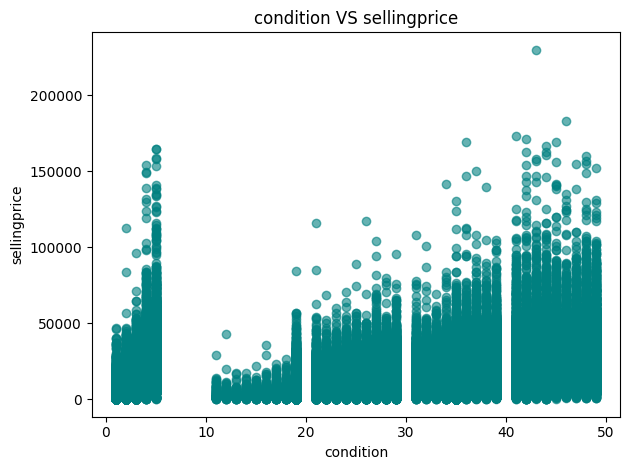

In [123]:
mp.scatter(x, y, color= "teal", alpha=0.6)
mp.title("condition VS sellingprice")
mp.xlabel("condition")
mp.ylabel("sellingprice")
mp.tight_layout()
mp.show()

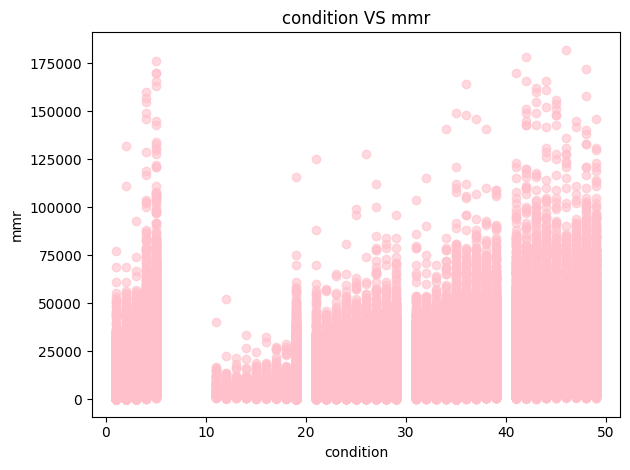

In [124]:
mp.scatter(x, z, color= "pink", alpha=0.6)
mp.title("condition VS mmr")
mp.xlabel("condition")
mp.ylabel("mmr")
mp.tight_layout()
mp.show()

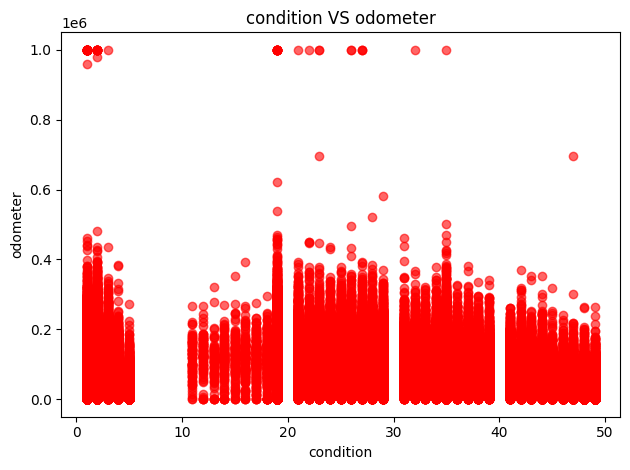

In [125]:
mp.scatter(x, u, color= "red", alpha=0.6)
mp.title("condition VS odometer")
mp.xlabel("condition")
mp.ylabel("odometer")
mp.tight_layout()
mp.show()

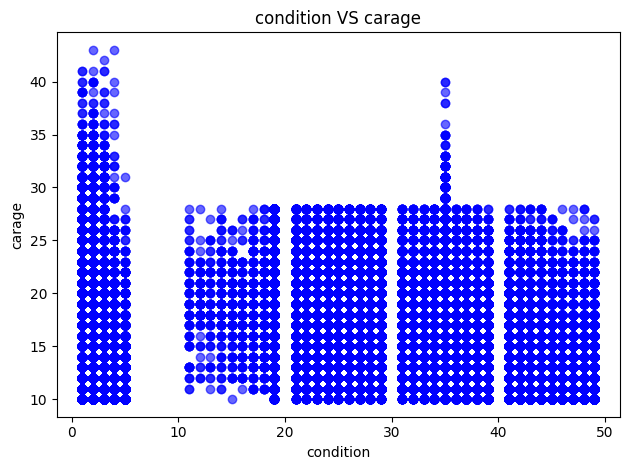

In [126]:
mp.scatter(x, v, color= "blue", alpha=0.6)
mp.title("condition VS carage")
mp.xlabel("condition")
mp.ylabel("carage")
mp.tight_layout()
mp.show()

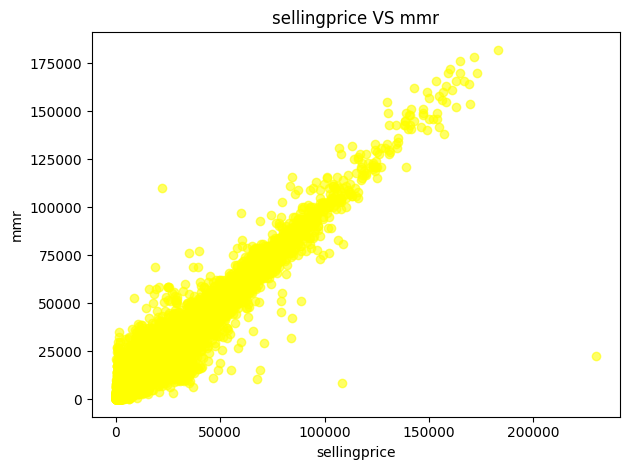

In [127]:
mp.scatter(y, z, color= "yellow", alpha=0.6)
mp.title("sellingprice VS mmr")
mp.xlabel("sellingprice")
mp.ylabel("mmr")
mp.tight_layout()
mp.show()

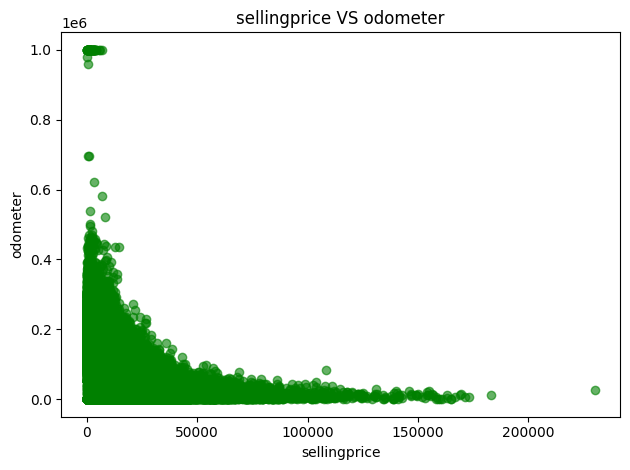

In [128]:
mp.scatter(y, u, color= "green", alpha=0.6)
mp.title("sellingprice VS odometer")
mp.xlabel("sellingprice")
mp.ylabel("odometer")
mp.tight_layout()
mp.show()

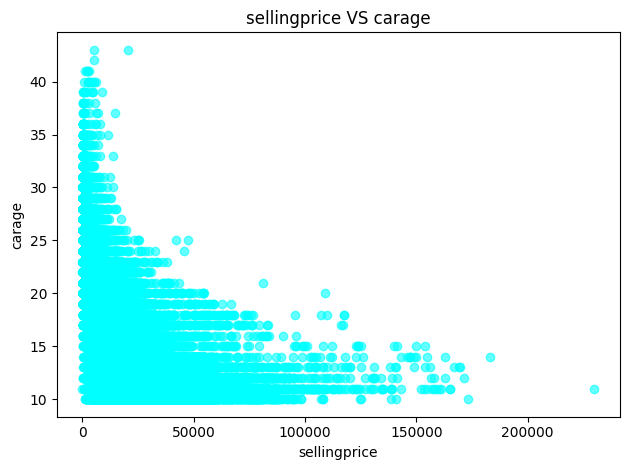

In [129]:
mp.scatter(y, v, color= "aqua", alpha=0.6)
mp.title("sellingprice VS carage")
mp.xlabel("sellingprice")
mp.ylabel("carage")
mp.tight_layout()
mp.show()

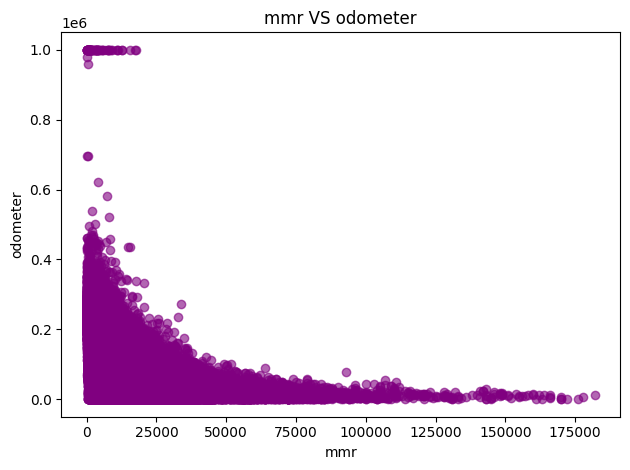

In [130]:
mp.scatter(z, u, color= "purple", alpha=0.6)
mp.title("mmr VS odometer")
mp.xlabel("mmr")
mp.ylabel("odometer")
mp.tight_layout()
mp.show()

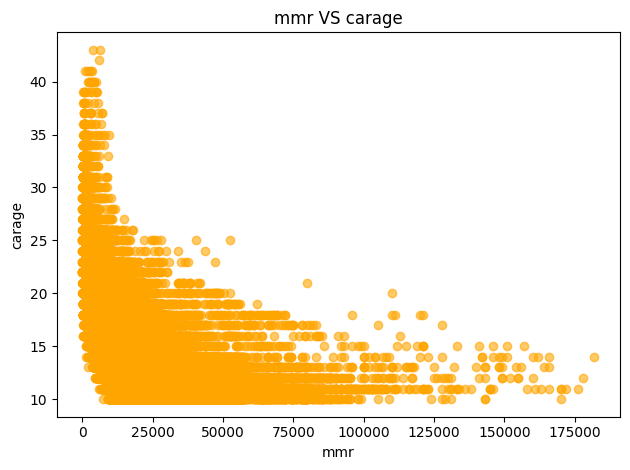

In [131]:
mp.scatter(z, v, color= "orange", alpha=0.6)
mp.title("mmr VS carage")
mp.xlabel("mmr")
mp.ylabel("carage")
mp.tight_layout()
mp.show()

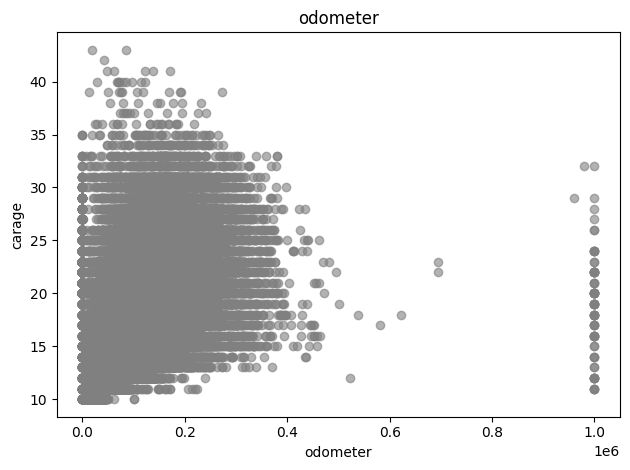

In [132]:
mp.scatter(u, v, color= "grey", alpha=0.6)
mp.title("odometer")
mp.xlabel("odometer")
mp.ylabel("carage")
mp.tight_layout()
mp.show()

## 3.2 Plot a graph to show the average selling price by year and explain the pattern you notice from the graph. Which plot will you use bar or scatter?

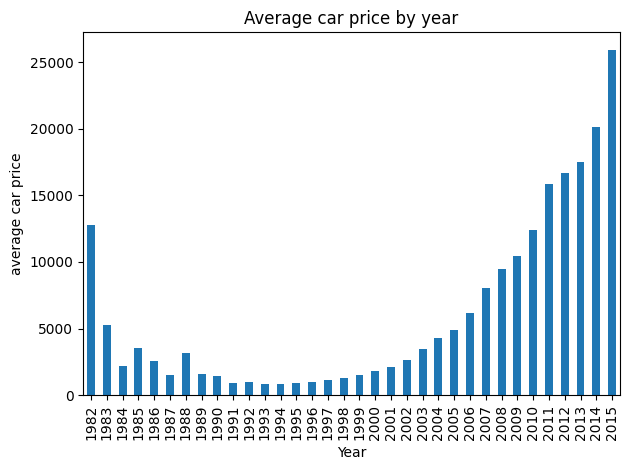

In [133]:
average_car_price_by_year = df1.groupby("year")["sellingprice"].mean()
average_car_price_by_year.plot(kind ="bar")
mp.title("Average car price by year")
mp.xlabel("Year")
mp.ylabel("average car price")
mp.xticks(rotation=90)
mp.tight_layout()
mp.show()

In [134]:
# bar plot was most suitable here to show the avaerage car price by year comparision
# 1. from 1982 to early 1990s there had been a steep decline in average car price 
# 2. from mid 1990s to 2000s there had been a gradual recovery 
# 3. from 2000s price increased dramatically.

## 3.3 Plot a graph to show average selling price by odometer and explain the trend you notice from the graph.

In [135]:
df1["odometer"].value_counts()
# as "odometer" is not a categorical data hence we can not use it directly

odometer
1.0         1318
52254.0      100
999999.0      72
10.0          29
21587.0       21
            ... 
70886.0        1
2102.0         1
1306.0         1
123979.0       1
128719.0       1
Name: count, Length: 172278, dtype: int64

In [136]:
df1["odometer_bin"]= (df1["odometer"] // 15000) * 15000
# hence creating a range for odometer i.e., per 15000 kms
df1["odometer_bin"].value_counts()

odometer_bin
15000.0     99158
30000.0     97704
45000.0     62556
0.0         51838
60000.0     44840
90000.0     38759
75000.0     38706
105000.0    32144
120000.0    26178
135000.0    20110
150000.0    14930
165000.0    10559
180000.0     7356
195000.0     4955
210000.0     3207
225000.0     2006
240000.0     1306
255000.0      872
270000.0      527
285000.0      382
300000.0      225
315000.0      146
330000.0       94
990000.0       72
345000.0       67
360000.0       44
375000.0       32
390000.0       14
450000.0       11
435000.0       10
420000.0        9
405000.0        7
495000.0        2
465000.0        2
690000.0        2
615000.0        1
510000.0        1
525000.0        1
945000.0        1
480000.0        1
570000.0        1
975000.0        1
Name: count, dtype: int64

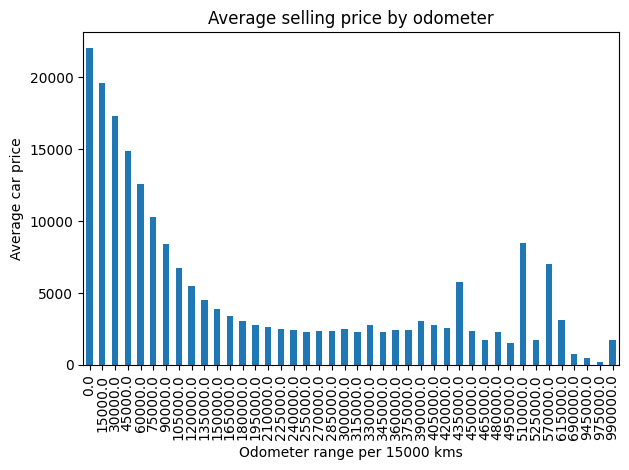

In [137]:
average_selling_price_by_odometer = df1.groupby("odometer_bin")["sellingprice"].mean()
average_selling_price_by_odometer.plot(kind= "bar")
mp.title("Average selling price by odometer")
mp.xlabel("Odometer range per 15000 kms")
mp.ylabel("Average car price")
mp.xticks(rotation= 90)
mp.tight_layout()
mp.show()

In [138]:
# the reason of setting the range upto per 15000kms due to the such vast amount of data points present in the dataset
# the graph shows that cars having less odometer reading tends to sell at much higher average selling price than the cars having more odometer reading
# although there is a slight peak observed at 435000 km bin and between 510000 and 615000 kms.

## 3.4 Plot a graph to show the number of cars sold in each state. Find the top three highest car selling states by having a look at the graph?

In [139]:
df1["state"].value_counts()

state
fl                   82945
ca                   73148
pa                   53907
tx                   45913
ga                   34750
                     ...  
3vwd17aj4fm236636        1
3vwd17aj5fm225953        1
3vwd17aj7fm326640        1
3vwd17aj8fm239622        1
3vwd17aj2fm261566        1
Name: count, Length: 64, dtype: int64

In [140]:
# As there are few enteries that are doubtfull for state code hence a seperate column created to segregate the genuing code with wrong non null entries.
df1["state_bin"] = df1["state"].apply(lambda x: x if len(str(x)) == 2 else "Unknown")

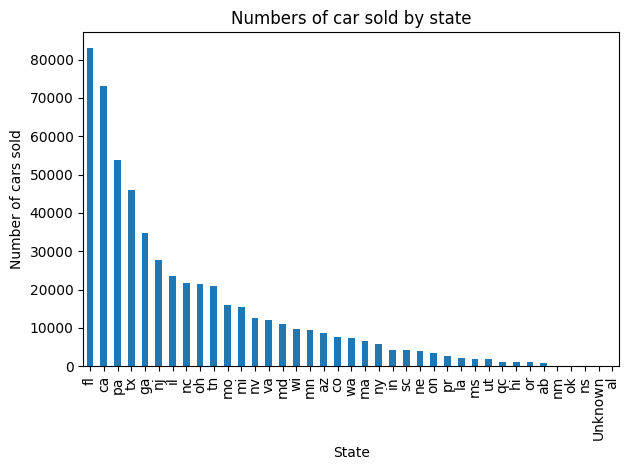

In [141]:
numbers_of_car_sold_by_state = df1.groupby("state_bin").size().sort_values(ascending= False)
numbers_of_car_sold_by_state.plot(kind= "bar")
mp.title("Numbers of car sold by state")
mp.ylabel("Number of cars sold")
mp.xlabel("State")
mp.tight_layout()
mp.show()


In [142]:
# Based on above plot the top three states are - 1. fl, 2. ca and 3. pa

## 3.5 Plot a bar graph of average selling price by condition score ranges of size 5. Give a summary of the insights.

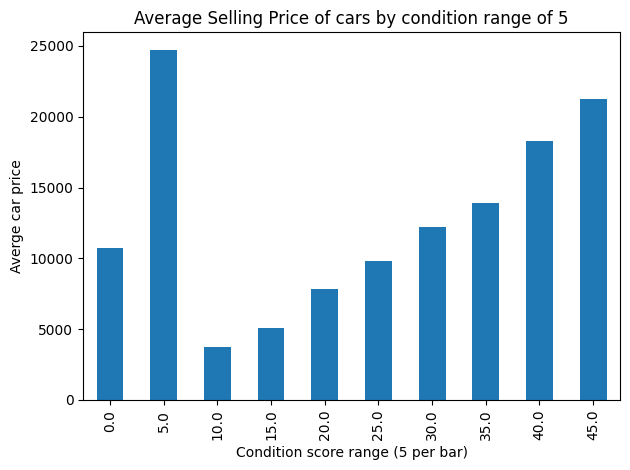

In [143]:
df1["condition_score_range_5"] = (df1["condition"] // 5) * 5
average_car_price_by_condition = df1.groupby("condition_score_range_5")["sellingprice"].mean()
average_car_price_by_condition.plot(kind= "bar")
mp.title("Average Selling Price of cars by condition range of 5")
mp.xlabel("Condition score range (5 per bar)")
mp.ylabel("Averge car price")
mp.tight_layout()
mp.show()


In [144]:
# high Average value of car selling price from 0.0 - 9.0  condition
# rest of the value from 10.0 - 49.0 condition score is showing a steady rise in  their average selling price.

## 3.6 Plot a bar graph of no. of cars sold by condition ranges of size 10. Give some insights from the graph.

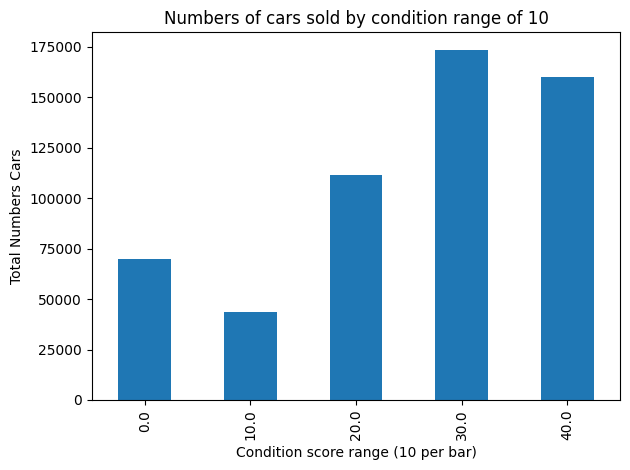

In [145]:
df1["condition_score_range_10"] = (df1["condition"] // 10) * 10
Number_cars_sold_by_condition = df1.groupby("condition_score_range_10").size()
Number_cars_sold_by_condition.plot(kind= "bar")
mp.title("Numbers of cars sold by condition range of 10")
mp.xlabel("Condition score range (10 per bar)")
mp.ylabel("Total Numbers Cars")
mp.tight_layout()
mp.show()


In [146]:
# cars condition range 10-19 have lowest number of cars sold then range 0-9.
# while condition range 30-39 has highest number of cars sold followed by 40-49 and then 20-29.

## 3.7 Plot a box plot to show the distribution of car selling prices grouped by color. Extract insights and if required, remove outliers and plot the graph again.

In [161]:
# Define known color names
known_colors = {
    "white", "gray", "black", "red", "silver", "blue", "brown", "beige", "purple",
    "burgundy", "gold", "yellow", "green", "charcoal", "orange", "off-white",
    "turquoise", "pink", "lime"
}

# Create new column: 'color_type'
df1["color_type"] = df1["color"].apply(
    lambda x: x if x in known_colors else ("Unknown" if x == "-" else "Limited Edition")
)

df1["color_type"].value_counts()

color_type
black              111719
white              106673
silver              83389
gray                82857
blue                51139
red                 43569
Limited Edition     24711
green               11382
gold                11342
beige                9222
burgundy             8972
brown                6717
orange               2078
purple               1561
off-white            1449
yellow               1285
charcoal              479
turquoise             236
pink                   42
lime                   15
Name: count, dtype: int64

C:\Users\Sundaram Samaddae\AppData\Local\Temp\ipykernel_10920\677435882.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  mp.boxplot(data, labels=colors, patch_artist=True)


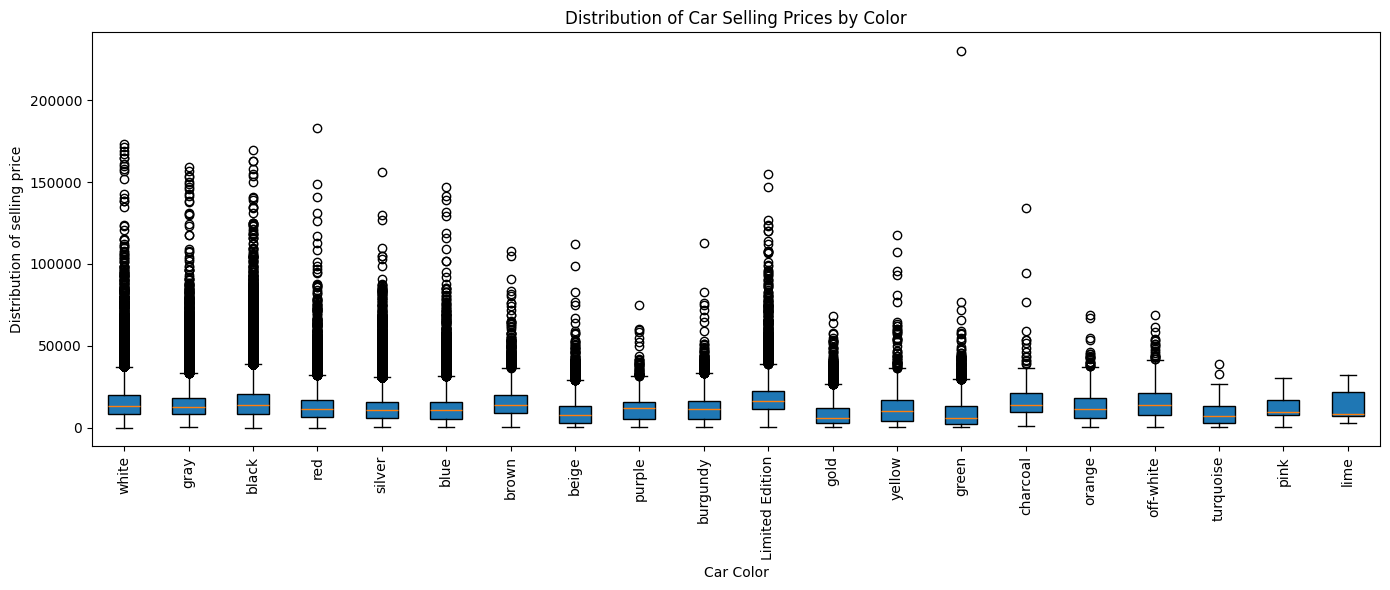

In [165]:
colors = df1["color_type"].unique()
data = [df1.loc[df1["color_type"] == c, "sellingprice"] for c in colors]
mp.figure(figsize=(14,6))
mp.boxplot(data, labels=colors, patch_artist=True)

mp.title("Distribution of Car Selling Prices by Color")
mp.xlabel("Car Color")
mp.ylabel("Distribution of selling price")
mp.xticks(rotation=90)
mp.tight_layout()
mp.show()


In [163]:
def remove_outliers_groupwise(df, group_col, value_col):
    def iqr_filter(group):
        Q1 = group[value_col].quantile(0.25)   # 25th percentile of prices in this color
        Q3 = group[value_col].quantile(0.75)   # 75th percentile of prices in this color
        IQR = Q3 - Q1                          # middle 50% spread
        return group[(group[value_col] >= Q1 - 1.5 * IQR) & 
                     (group[value_col] <= Q3 + 1.5 * IQR)]
    
    return df.groupby(group_col, group_keys=False).apply(iqr_filter)

C:\Users\Sundaram Samaddae\AppData\Local\Temp\ipykernel_10920\2965037387.py:9: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(group_col, group_keys=False).apply(iqr_filter)
C:\Users\Sundaram Samaddae\AppData\Local\Temp\ipykernel_10920\1118776070.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  mp.boxplot(data, labels=colors, patch_artist=True)


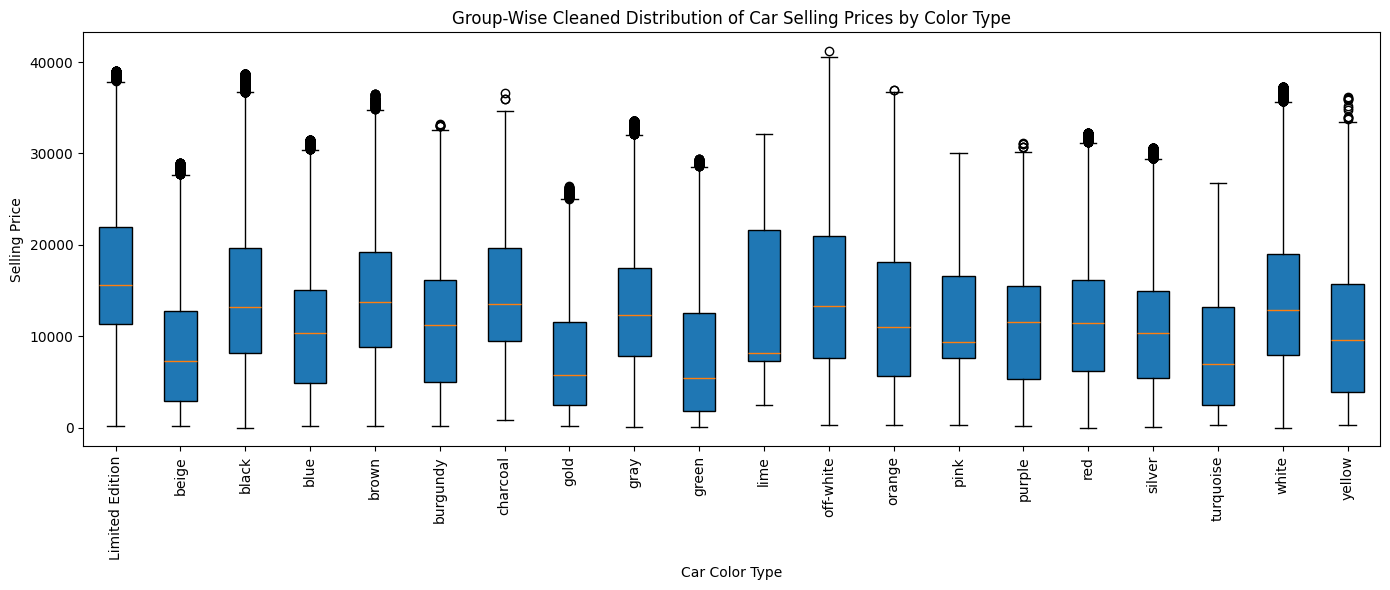

In [164]:
df_clean = remove_outliers_groupwise(df1, "color_type", "sellingprice")
colors = df_clean["color_type"].unique()
data = [df_clean.loc[df_clean["color_type"] == c, "sellingprice"] for c in colors]
mp.figure(figsize=(14,6))
mp.boxplot(data, labels=colors, patch_artist=True)
mp.title("Group-Wise Cleaned Distribution of Car Selling Prices by Color Type")
mp.xlabel("Car Color Type")
mp.ylabel("Selling Price")
mp.xticks(rotation=90)
mp.tight_layout()
mp.show()